In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from dataclasses import dataclass
import pandas as pd
import vice
from scipy.interpolate import interp1d
from scipy.integrate import quad
import arya
from surp.src.analysis.vice_model import vice_model
from surp.src.analysis import apogee_analysis as aah

In [17]:
plt.rcParams["figure.dpi"] = 200

In [4]:
width = 3
ϕ = np.sqrt(2)
height = width/ϕ
arya.style.set_size((width, height))


In [5]:
fiducial = vice_model("../output/C11_f0.2_eta1_beta0.001.json")

one file saved at ./cooh_scatter.pdf


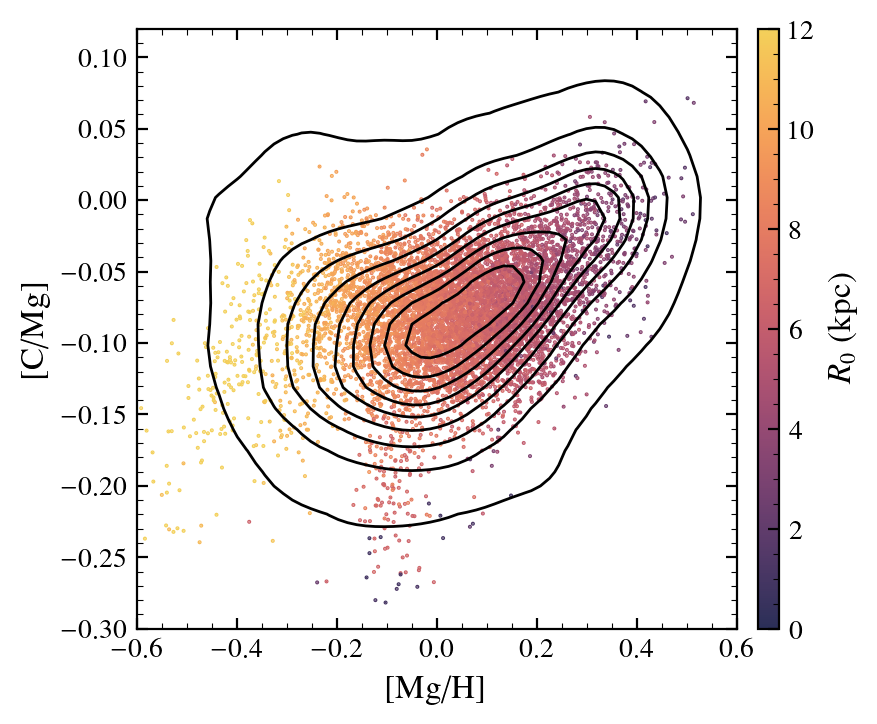

In [24]:
s = fiducial.stars["solar"]

N = len(s)
dx = 0.03
dy = 0.03
sp = arya.Subplot(size=(3,3))
aah.plot_contour("[mg/h]", "[c/mg]", ax=sp.mpl_ax, zorder=3)

scat = arya.Scatter(s["[mg/h]"] + np.random.normal(0, dx, N), s["[c/mg]"] + np.random.normal(0, dy, N), 
             c = s["r_origin"], s=0.2, zorder=2, subplot=sp)
scat.clim = (0, 12)
cb = arya.Colorbar(subplot=sp, layer=scat, row=0, col=1, width=arya.Length(0.05*height))
cb.label = "$R_0$ (kpc)"


sp.x.label=r"[Mg/H]"
sp.y.label=r"[C/Mg]"
sp.x.lim=(-0.6, 0.6)
sp.y.lim=(-0.3, 0.12)

sp.save("cooh_scatter.pdf")

NameError: name 'surp' is not defined

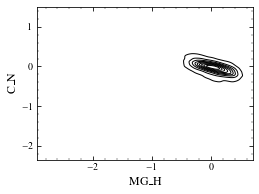

In [12]:
N = len(s)
dx = 0.03
dy = 0.03
sp = arya.Subplot()
aah.plot_contour("[mg/h]", "[c/n]", ax=sp.mpl_ax, zorder=3)

scat = arya.Scatter(s["[mg/h]"] + np.random.normal(0, dx, N), s["[c/n]"] + np.random.normal(0,
                                                                                            c = s["r_origin"], s=0.2, zorder=2, subplot=sp))
scat.clim = (0, 12)
cb = arya.Colorbar(subplot=sp, layer=scat, row=0, col=1,  width=arya.Length(0.05*height))
cb.label = "$R_0$ (kpc)"


sp.x.label=r"[Mg/H]"
sp.y.label=r"[C/N]"
sp.x.lim=(-0.6, 0.6)
sp.y.lim=(-0.5, 0.4)

sp.save("cnoh_scatter.pdf")

one file saved at ./evo_tracks.pdf


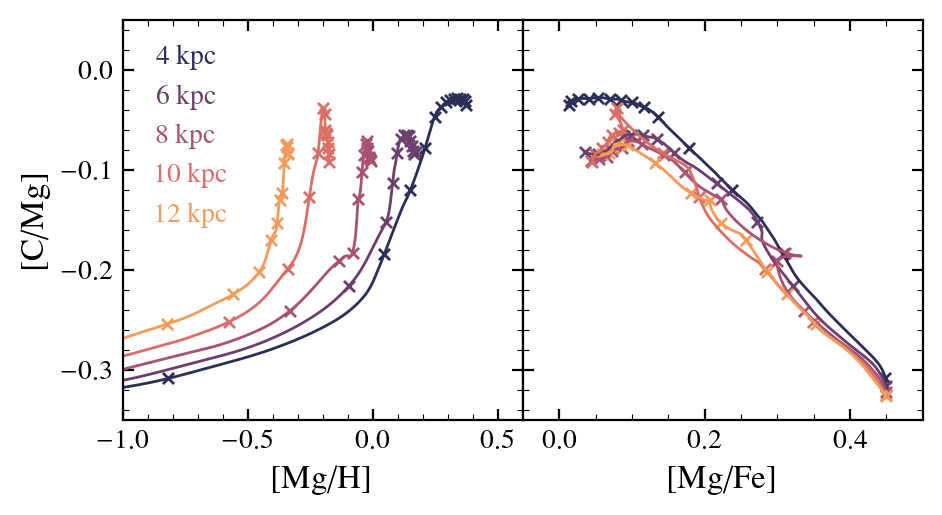

In [23]:
jp = arya.JoinPlot(1, 2, size=(4, 2))

sp = jp.children[0][0]

fiducial.plot_R_slices("[mg/h]", "[c/mg]", ax=sp.mpl_ax)

sp.x.label = r"[Mg/H]"
sp.y.label = r"[C/Mg]"
sp.x.lim = (-1, 0.6)
sp.y.lim = (-0.35, 0.05)


sp = jp.children[0][1]

fiducial.plot_R_slices("[mg/fe]", "[c/mg]", ax=sp.mpl_ax, legend=False)
sp.x.label = r"[Mg/Fe]"
sp.y.label = r""
sp.x.lim = (-0.05, 0.5)


sp.save("evo_tracks.pdf")

one file saved at ./evo_slices.pdf


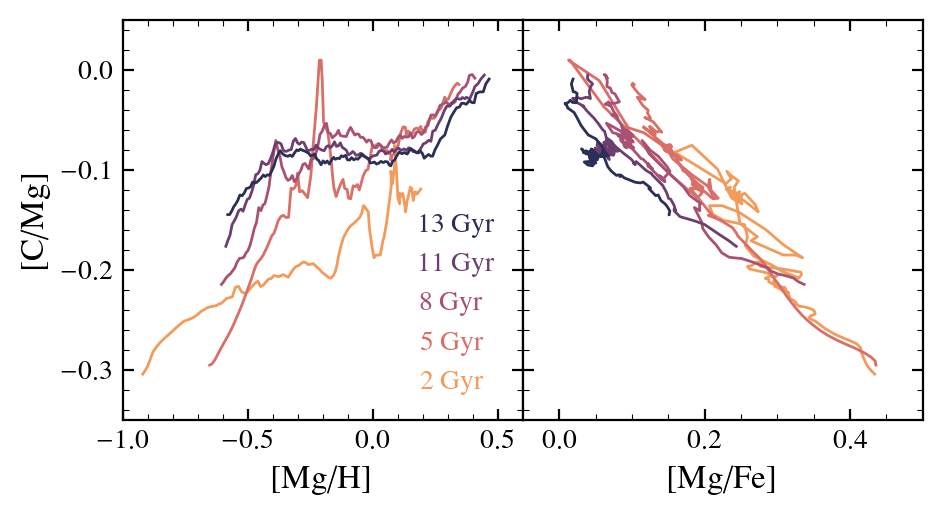

In [25]:
jp = arya.JoinPlot(1, 2, size=(4,2))

sp = jp.children[0][0]

fiducial.plot_t_slices("[mg/h]", "[c/mg]", ax=sp.mpl_ax)




sp.x.label = r"[Mg/H]"
sp.y.lim = (-0.35, 0.05)
sp.y.label = r"[C/Mg]"
sp.x.lim = (-1, 0.6)

sp = jp.children[0][1]


fiducial.plot_t_slices("[mg/fe]", "[c/mg]", ax=sp.mpl_ax, legend=False)



sp.x.label = r"[Mg/Fe]"
sp.y.label = r""
sp.x.lim = (-0.05, 0.5)

sp.save("evo_slices.pdf")

one file saved at ./mg_fe_scatter.pdf


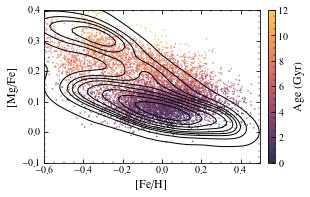

In [15]:

model = vice_model("../output/C11_f0.2_eta1_beta0.001_twoexp0.3.json")
s = model.stars["solar"]

N = len(s)
dx = 0.03
dy = 0.03
sp = arya.Subplot()
aah.plot_contour("[fe/h]", "[mg/fe]", ax=sp.mpl_ax, zorder=3, exclude_high_alpha=False)

scat = arya.Scatter(s["[fe/h]"] + np.random.normal(0, dx, N), s["[mg/fe]"] + 0.05 + np.random.normal(0, dy, N), 
             c = s["age"], s=0.2, zorder=2, subplot=sp)

scat.clim = (0, 12)
cb = arya.Colorbar(subplot=sp, layer=scat, row=0, col=1,  width=arya.Length(0.05*height))
cb.label = "Age (Gyr)"


sp.x.label=r"[Fe/H]"
sp.y.label=r"[Mg/Fe]"
sp.x.lim=(-0.6, 0.5)
sp.y.lim=(-0.1, 0.4)

sp.save("mg_fe_scatter.pdf")